In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("wisdm_watch_accel.csv")
df.head()

,Unnamed: 0,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""",...,"""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class""",location
0,10807,b'P',0.000,0.005,0.015,0.045,0.475,0.390,0.070,0.000,...,0.475261,-0.868185,0.128353,-0.192599,0.473250,0.101977,-0.268787,10.3729,b'1638',1
1,8496,b'C',0.000,0.000,0.000,0.020,0.175,0.265,0.270,0.230,...,0.454954,-0.430003,-0.683816,0.159712,0.026523,-0.324429,-0.191616,10.9713,b'1625',2
2,13875,b'R',0.845,0.120,0.015,0.005,0.000,0.000,0.000,0.000,...,0.687652,-0.650537,-0.360839,0.069997,-0.497085,0.442408,-0.522440,10.3849,b'1604',0
3,2553,b'P',0.125,0.185,0.190,0.180,0.080,0.050,0.045,0.035,...,0.708139,-0.573851,0.411031,-0.663696,-0.424415,0.219443,-0.552526,11.9201,b'1622',1
4,14263,b'M',0.000,0.035,0.010,0.065,0.150,0.540,0.180,0.020,...,0.462296,-0.729113,0.168830,-0.151120,0.468516,-0.202634,0.115061,10.4240,b'1612',2


In [4]:
df.shape

(18211, 95)

In [94]:
df=df.drop(columns=['"class"'],axis=1)

In [95]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [96]:
df.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""",location
0,b'P',0.000,0.005,0.015,0.045,0.475,0.390,0.070,0.000,0.000,...,0.481447,0.475261,-0.868185,0.128353,-0.192599,0.473250,0.101977,-0.268787,10.3729,1
1,b'C',0.000,0.000,0.000,0.020,0.175,0.265,0.270,0.230,0.020,...,0.460876,0.454954,-0.430003,-0.683816,0.159712,0.026523,-0.324429,-0.191616,10.9713,2
2,b'R',0.845,0.120,0.015,0.005,0.000,0.000,0.000,0.000,0.000,...,0.696604,0.687652,-0.650537,-0.360839,0.069997,-0.497085,0.442408,-0.522440,10.3849,0
3,b'P',0.125,0.185,0.190,0.180,0.080,0.050,0.045,0.035,0.025,...,0.717357,0.708139,-0.573851,0.411031,-0.663696,-0.424415,0.219443,-0.552526,11.9201,1
4,b'M',0.000,0.035,0.010,0.065,0.150,0.540,0.180,0.020,0.000,...,0.468313,0.462296,-0.729113,0.168830,-0.151120,0.468516,-0.202634,0.115061,10.4240,2


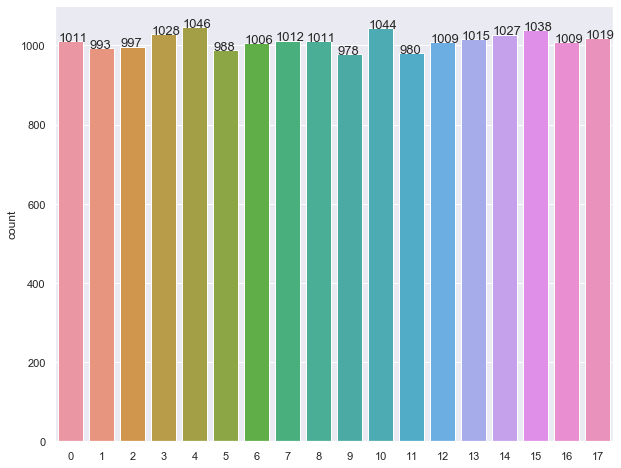

In [97]:
y = df.iloc[:, 0].values
y=y.astype('str')

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labels= labelencoder_y.fit_transform(y)

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=labels)
for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(), s=str(i.get_height()),fontsize=13)

In [98]:
accuracy=[]
accuracyl=[]

In [99]:
# WITHOUT LOCATION MODEL
y = df.iloc[:, 0].values
y=y.astype('str')

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [100]:
x = df.iloc[:, 1:92].values
x.shape

(18211, 91)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
Accuracy_d1=accuracy_score(y_test,y_pred)
Accuracy_d1

0.7388535031847133

In [30]:
accuracy.append(Accuracy_d1)

In [32]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)


y_pred = classifier.predict(x_test)
Accuracy_r1=accuracy_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x, y, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.01)


In [33]:
Accuracy_r1=(scores.mean(), scores.std() * 2)

In [78]:
del accuracy[1]

In [80]:
accuracy.insert(1,Accuracy_r1[0])

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import layers

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = Sequential()

model.add(Dense(64,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(18,activation = "softmax"))
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
history =  model.fit(x,y,validation_split=0.33,epochs = 20)


Using TensorFlow backend.



Train on 12201 samples, validate on 6010 samples
Epoch 1/20
12201/12201 [==============================] - 24s 2ms/step - loss: 1.8345 - accuracy: 0.4156 - val_loss: 1.4011 - val_accuracy: 0.5471
Epoch 2/20
12201/12201 [==============================] - 24s 2ms/step - loss: 1.2793 - accuracy: 0.5721 - val_loss: 1.2506 - val_accuracy: 0.5814
Epoch 3/20
12201/12201 [==============================] - 24s 2ms/step - loss: 1.0846 - accuracy: 0.6383 - val_loss: 1.0665 - val_accuracy: 0.6389
Epoch 4/20
12201/12201 [==============================] - 24s 2ms/step - loss: 0.9279 - accuracy: 0.6844 - val_loss: 0.9353 - val_accuracy: 0.6775
Epoch 5/20
12201/12201 [==============================] - 24s 2ms/step - loss: 0.8520 - accuracy: 0.7099 - val_loss: 0.9225 - val_accuracy: 0.6905
Epoch 6/20
12201/12201 [==============================] - 24s 2ms/step - loss: 0.7892 - accuracy: 0.7302 - val_loss: 0.8795 - val_accuracy: 0.7025
Epoch 7/20
12201/12201 [==============================] - 24s 2ms/st

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


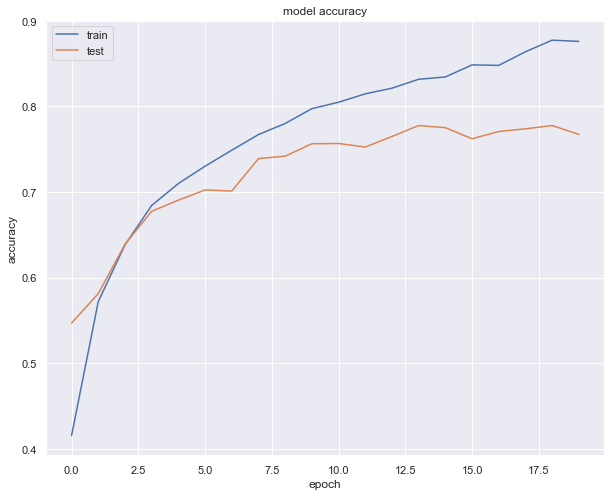

In [36]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import layers

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = Sequential()

model.add(Dense(64,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(Dense(18,activation = "softmax"))
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
history =  model.fit(x,y,validation_split=0.33,epochs = 20)


Train on 12201 samples, validate on 6010 samples
Epoch 1/20
12201/12201 [==============================] - 39s 3ms/step - loss: 1.8991 - accuracy: 0.3853 - val_loss: 1.5041 - val_accuracy: 0.4755
Epoch 2/20
12201/12201 [==============================] - 29s 2ms/step - loss: 1.3250 - accuracy: 0.5594 - val_loss: 1.1873 - val_accuracy: 0.6020
Epoch 3/20
12201/12201 [==============================] - 38s 3ms/step - loss: 1.1278 - accuracy: 0.6200 - val_loss: 1.0587 - val_accuracy: 0.6471
Epoch 4/20
12201/12201 [==============================] - 31s 3ms/step - loss: 1.0027 - accuracy: 0.6604 - val_loss: 0.9754 - val_accuracy: 0.6800
Epoch 5/20
12201/12201 [==============================] - 32s 3ms/step - loss: 0.9125 - accuracy: 0.6885 - val_loss: 0.8926 - val_accuracy: 0.7047
Epoch 6/20
12201/12201 [==============================] - 28s 2ms/step - loss: 0.8406 - accuracy: 0.7163 - val_loss: 0.9196 - val_accuracy: 0.6975
Epoch 7/20
12201/12201 [==============================] - 36s 3ms/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


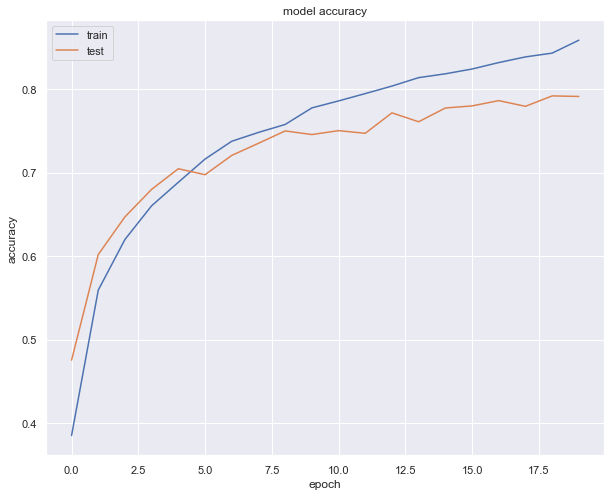

In [103]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
accuracy_a1=model.evaluate(x_test,y_test)[1]
accuracy_a1

4553/4553 [==============================] - 1s 296us/step


0.8346145153045654

In [40]:
accuracy.append(accuracy_a1)

In [41]:
#WITH LOCATION
x1 = df.iloc[:, 1:].values
x1.shape

(18211, 92)

In [42]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.25,random_state=0)

In [43]:
#DECISION TREE WTITH LOCATION
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x1_train,y1_train)
y1_pred = clf.predict(x1_test)

from sklearn.metrics import accuracy_score
Accuracy_d2=accuracy_score(y1_test,y1_pred)
Accuracy_d2

0.7878321985504063

In [44]:
accuracyl.append(Accuracy_d2)

In [45]:
#RANDOM FOREST WITH LOCATION

classifier = RandomForestClassifier(n_estimators = 400, criterion = 'gini', random_state = 0)
classifier.fit(x1_train, y1_train)


y1_pred = classifier.predict(x1_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x1, y, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
Accuracy_r2 = (scores.mean(), scores.std() * 2)

Accuracy: 0.88 (+/- 0.01)


In [73]:
del accuracyl[1]

In [74]:
accuracyl.insert(1,Accuracy_r2[0])

In [47]:
#ANN WITH LOCATION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = Sequential()

model.add(Dense(64,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(Dense(1024,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(Dense(18,activation = "softmax"))
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
history =  model.fit(x1_train,y1_train,epochs = 20)

Epoch 1/20
13658/13658 [==============================] - 27s 2ms/step - loss: 0.9799 - accuracy: 0.6598
Epoch 2/20
13658/13658 [==============================] - 27s 2ms/step - loss: 0.5859 - accuracy: 0.7970
Epoch 3/20
13658/13658 [==============================] - 27s 2ms/step - loss: 0.4882 - accuracy: 0.8260
Epoch 4/20
13658/13658 [==============================] - 28s 2ms/step - loss: 0.4258 - accuracy: 0.8522
Epoch 5/20
13658/13658 [==============================] - 25s 2ms/step - loss: 0.3777 - accuracy: 0.8678
Epoch 6/20
13658/13658 [==============================] - 25s 2ms/step - loss: 0.3437 - accuracy: 0.8809
Epoch 7/20
13658/13658 [==============================] - 26s 2ms/step - loss: 0.3194 - accuracy: 0.8861 0s - loss: 0.3193 - accuracy: 0.
Epoch 8/20
13658/13658 [==============================] - 27s 2ms/step - loss: 0.2856 - accuracy: 0.8984
Epoch 9/20
13658/13658 [==============================] - 29s 2ms/step - loss: 0.2669 - accuracy: 0.9066
Epoch 10/20
13658/1365

In [48]:
accuracy_a2=model.evaluate(x1_test,y1_test)
accuracy_a2[1]

4553/4553 [==============================] - 1s 242us/step


0.8824950456619263

In [49]:
accuracyl.append(accuracy_a2[1])

In [86]:
accuracies = [85.94,87.61,87.87, 88.24,86.84, 86.03, 85.74, 84.86]
layers = [1,2,3,4,5,6,7,8]
df = pd.DataFrame(list(zip(layers, accuracies)), 
               columns =['layers', 'accuracies']) 

In [87]:
layers1=[1,2,3,4,5,6,7,8]
accuracies_without = [78.80, 83.08, 83.21, 83.46, 82.84, 81.55, 81.03, 80.98]

In [88]:
df1 = pd.DataFrame(list(zip(layers1, accuracies_without)), 
               columns =['layers', 'accuracies_without']) 

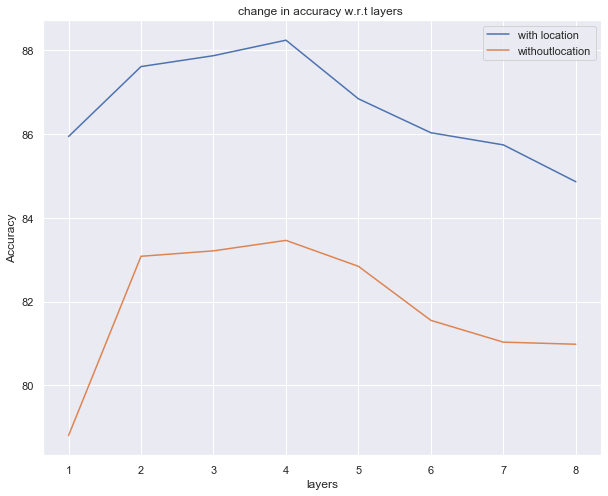

In [89]:
plt.plot(layers, accuracies, label = "with location") 
plt.plot(layers1, accuracies_without, label = "withoutlocation")
plt.xlabel('layers')
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('change in accuracy w.r.t layers ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


In [81]:
accuracy

[0.7388535031847133, 0.8409703800493078, 0.8346145153045654]

In [75]:
accuracyl

[0.7878321985504063, 0.8772678426336974, 0.8824950456619263]

In [82]:
accuracy = [ '%.2f' % elem for elem in accuracy ]
accuracyl = [ '%.2f' % elem for elem in accuracyl]

In [84]:
accuracy = [ '%.2f' % elem for elem in accuracy ]
accuracyl = [ '%.2f' % elem for elem in accuracyl]

In [34]:
accuracy=[0.72,0.74,0.84,0.83]
accuracyl=[0.75,0.79,0.88,0.88]

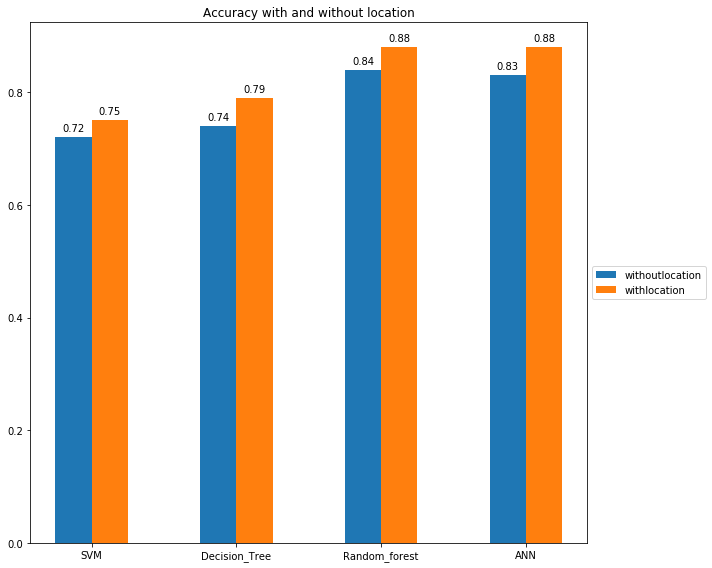

In [35]:
labels = ['SVM', 'Decision_Tree','Random_forest','ANN']

x = np.arange(len(labels))  # the label locations
width = 0.25

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x -0.5*width, accuracy, width, label='withoutlocation')
rects2 = ax.bar(x +0.5*width, accuracyl,width, label='withlocation')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Accuracy with and without location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()